<a href="https://colab.research.google.com/github/GwenTsang/Papyri/blob/main/tp2_la_chasse_au_papyrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TP2 : La chasse au papyrus

  Internet regorge de bases de données intéressantes, surtout pour les linguistes et les humanités numériques. En effet, ils mettent souvent en ligne des bases de données spécialisées permettant (gratuitement ou non) d'explorer une collection particulière. Si la base de donnée est hébergée sur le site et naviguable, on ne peut malheureusement pas en faire une exploration quantitative puisque les sites n'offrent pas l'option de télécharger l'ensemble des données. De plus on est pas forcément intéressé par toute la collection ni par toutes les métadonnées disponibles pour chaque document.


Heureusement, python est là pour nous aider !

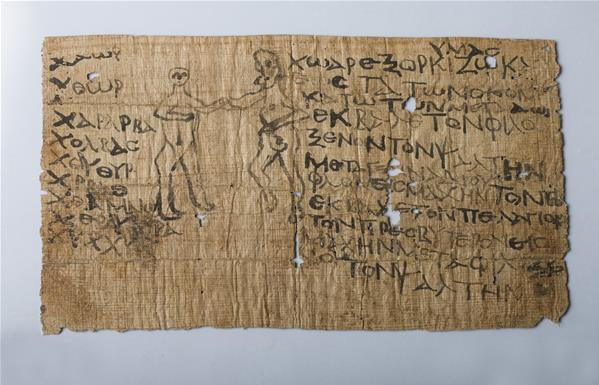

Image issue de https://antiquities.bibalex.org/Collection/Detail.aspx?lang=fr&a=508

L'objectif de ce TP est de collecter, stocker et analyser une collection de papyri grecs. Ce sera l'occasion de voir comment on peut utiliser les librairies de data science actuelles pour observer et analyser un dataset original

**Objectifs :**

1) Résiver les techniques de web scraping pour voir comment collecter un dataset:
* déduire la structure des url à regarder
* télécharger les pages HTML
* regarder la structure de la page et utiliser un parser HTML pour extraire les données

2) stocker les données sous un format csv. Utiliser pandas pour les analyser

3) construire des visualisations intéressantes du dataset

4) gérer le texte grec, son encodage, les outils TAL pour le traiter

5) utiliser streamlit, une librairie intuitive pour créer un front permettant d'explorer la collection de papyri.

**NB : LE TP EST A REALISER DANS DES FICHIERS PY ISOLES ET PAS SUR LE NOTEBOOK **

Le rendu prendra la forme d'une archive contenant 3 fichiers .py ainsi qu'un fichier requirements.txt

# I) Web scraping et collecte de la base de données des papyrus. /6

L'objectif de ce TP est d'analyser une collection de papyri grecs particulière.

Nous nous intéresserons à une partie de la collection préservée sur le site trismegistos.

https://www.trismegistos.org/

Nous ne nous intéresserong qu'à un nombre limité de papyri dont la liste est fournie en annexe (fichier papyrus_metadata.csv)



# 1)Collecte des URL

 A partir de la liste des papyri à étudier, générez la liste des url à crawler. Pour cela parcourez le site pour comprendre la structure des url donnant accès à un papyrus.

# **Scraping**

La fonction `scrap_papyrus()` retourne un JSON contenant les informations suivantes sur le papyrus:</br>

✅ Language</br>
✅ Content</br>
✅ Date</br>
✅ Provenance</br>
✅ Material</br>
✅ Archive</br>
✅ Collections</br>
✅ Publications</br>
✅ Le texte grec formaté</br>
✅ La liste des noms de personnes</br>
✅ La liste des noms de lieux</br>
✅ La liste des irrégularités textuelles</br>

En python :
```python
            item_data = {
                "Language": None,
                "Content": None,
                "Date": None,
                "Provenance": None,
                "Material": None,
                "Archive": [],
                "Collections": [],
                "Publications": [],
                "GreekText": None,
                "People": [],
                "Places": [],
                "Irregularities": []
            }
```

Voir le fichier https://raw.githubusercontent.com/GwenTsang/Papyri/refs/heads/main/scrapping/scrapapyrus.py

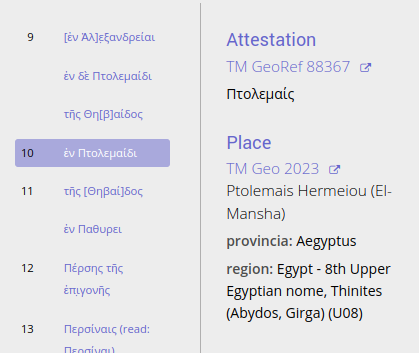

tester ce script sur **une** url au hasard pour vérifier qu'il fonctionne.

# II) Analyse du dataset /10



Dans cette partie, nous allons utiliser les librairies de datascience pour visualiser, analyser et enrichir le corpus que nous avons scrapé

Pour ne pas pénaliser un scraping imparfait et que je puisse vérifier plus facilement les résultats, vous allez tous télécharger le fichier "papyrus_corpus.csv".

Vous pouvez traitez cette partie du TP soit dans le notebook, soit dans un fichier nommé corpus_analysis.py qui devra s'exécuter correctement de A à Z, affichez les réponses avec un message explicite (print correctement f formatté) et les graphiques demandés (plt.show()) après chaque graphe)

In [1]:
!wget https://raw.githubusercontent.com/Dinarque/INALCO_Techniques_web_en_python_2025/refs/heads/main/TP/papyrus_corpus.csv

--2025-12-22 16:41:14--  https://raw.githubusercontent.com/Dinarque/INALCO_Techniques_web_en_python_2025/refs/heads/main/TP/papyrus_corpus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2089431 (2.0M) [text/plain]
Saving to: ‘papyrus_corpus.csv’

papyrus_corpus.csv  100%[===================>]   1.99M  --.-KB/s    in 0.07s   

2025-12-22 16:41:14 (29.9 MB/s) - ‘papyrus_corpus.csv’ saved [2089431/2089431]



# 4) Chargement et nettoyage du dataset

Il faut d'abord charger ce corpus et le nettoyer un peu:
* Charger le fichier csv dans un DataFrame
* Observer le dataset. Que dire des 4 premières lignes ?  Que faire ? Faites-le.


In [2]:
import polars as pl

df = pl.read_csv("/content/papyrus_corpus.csv")
print(df.head(4))

shape: (4, 18)
┌──────────┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬─────┬────────────┐
│ ID       ┆ Authors /  ┆ Book form  ┆ Content    ┆ … ┆ Reuse note ┆ Reuse type ┆ Ro  ┆ Text Irreg │
│ ---      ┆ works      ┆ ---        ┆ (beta!)    ┆   ┆ ---        ┆ ---        ┆ --- ┆ ularities  │
│ str      ┆ ---        ┆ str        ┆ ---        ┆   ┆ str        ┆ str        ┆ str ┆ ---        │
│          ┆ str        ┆            ┆ str        ┆   ┆            ┆            ┆     ┆ str        │
╞══════════╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪═════╪════════════╡
│ TM 58376 ┆ nan        ┆ nan        ┆ funerary   ┆ … ┆ nan        ┆ nan        ┆ nan ┆ []         │
│          ┆            ┆            ┆ (human)    ┆   ┆            ┆            ┆     ┆            │
│ TM 61011 ┆ Homerus,Il ┆ codex (10  ┆ school     ┆ … ┆ nan        ┆ nan        ┆ nan ┆ []         │
│          ┆ ias:2.379- ┆ pages);    ┆ text?      ┆   ┆            ┆        

* Combien de textes n'ont pas été capturés pendant le scraping ? Comment le voit-on ? Enlevez-les
* Combien la collection compte-t elle de papyrus après nettoyage ?


* Trier la collection selon l'ID (ordre croissant)

In [3]:
import polars as pl

# Tri du DataFrame
df = df.sort(
    pl.col("ID")
    .str.strip_prefix("TM ")
    .cast(pl.Int64)           # Conversion en nombres entiers
)

# Afficher le résultat
print(df)

KeyboardInterrupt: 

# 5) Etude de corpus : genre, lieu et date


* Quelles sont les différents genre de texte que l'on a collecté ? La nomenclature de la colonne "Content (beta!) est un peu trop précise. Basez-vous sur le premier mot et créez un graphique.
* Affichez cela sous la forme d'un pie chart
* combien de papyri ont-ils été réutilisés ?

* D'où viennent les papyri ?  De même ne retenez que le nom de la ville. Faites un diagramme en barre cette fois.
* Qu'en concluez-vous ?

*Identifier la date d'écriture. Observez la catégorie des dates et nettoyez le texte pour regrouper ensemble les catégories pertinente
* Formattez les dates sous le format d'une date simple AD xxx
ou d'un intervalle AD xxx - xxx
* Utilisez ensuite ces valeurs discrètes ou intervalles pour construire un diagramme représentant la densité de papyri sur chaque année du dataset.
NB quand il y a plusieurs dates mentionnées dans la colonne on ne prendra en compte que la première
NB : il faudra transformer les bornes en intervalles continus.

NB Les graphes devraient ressembler à ça :



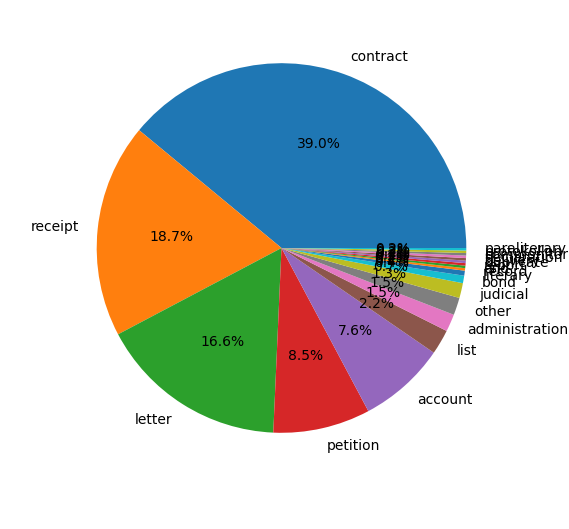

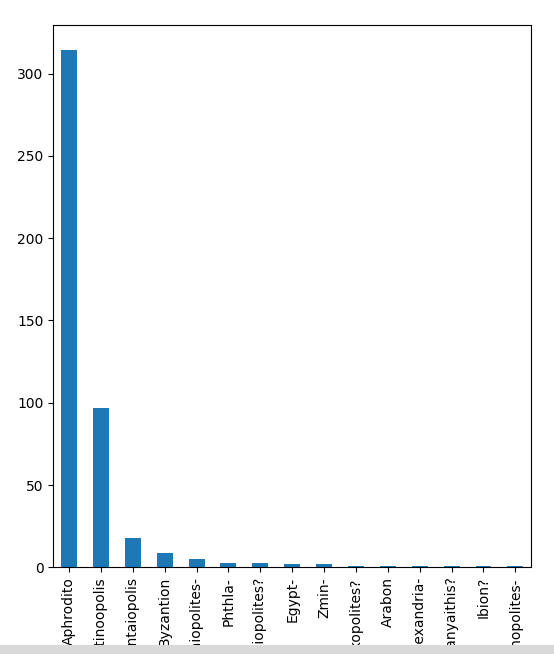

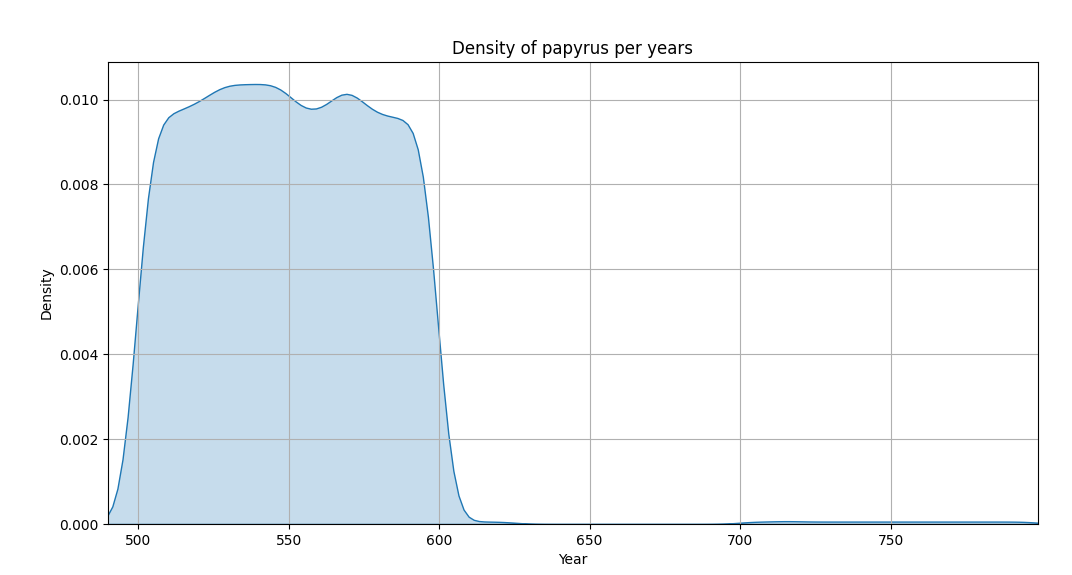

# 6) Nettoyage du texte grec

* écrivez une première fonction de nettoyage du texte qui retire les chiffres arabes, les lignes perdues | gap | ainsi que les caractères spéciaux "†" et "⳨". Appliquez là au texte.
*  Voici la signification de certains codes en papyrologie :
 - Les petits points en dessous de certaines lettres indiquent que la lettre est défformée ou difficilement lisible
 - Les zones entre crochets droits ou parenthèses indiquent que le texte est reconstitué par un auteur, et était illisible / détruit.
 Ecrivez une fonction qui prend en entrée un texte de papyrus nettoyé et renvoie la proportion de lettres incertaines dans le texte. Stockez pour chaque texte cette valeur dans la colonne "Uncertain Portion"
 Combien y a-t de papyrus dont plus du tiers du texte est incertain ?

* Ecrivez une fonction qui enlève les parenthèses et les crochets mais converve leur contenu. Utilisez là sur le texte


Pour ce faire on utilisera les expressions régulières. </br>
Pour enlever les chiffres arabes on utilise `\d` qui correspond à un entier (0, 1, ..., 9)

```python
def remove_numbers(text):
    return re.sub(r'\d', '', text)
```

# 7) Identifier les noms de personnes et de lieux

* Observez le contenu des cellules de la case "people-list". Que remarquez-vous ? Réglez le(s) problème(s) de manière à ne retenir que les noms

* Utilisez le pour stocker les entités repérées dans les colonnes "People Ugarit" "Places Ugarit" et "Other Ugarit"
Commentez les résultat




In [ ]:
# Avec polars

import polars as pl
df = pl.read_csv('/content/papyrus_corpus.csv')

print(df[:10].select(pl.col(df.columns[10])))

In [ ]:
# Avec pandas

import pandas as pd

df = pd.read_csv('/content/papyrus_corpus.csv')
print(df.iloc[:10, 10])

**Constat** : c'est pas du tout propre

In [ ]:
#@title Nettoyage des trois colonnes "People List", "Full Text" et "Places List" de papyrus_corpus.csv

import polars as pl
import ast
import re
import math
from typing import Any, List

INPUT_CSV = "/content/papyrus_corpus.csv"
OUTPUT_CSV = "/content/papyrus_corpus_cleaned.csv"
COLUMNS_TO_CLEAN = ["People List", "Full Text", "Places List"]

# Greek + Greek Extended + combining diacritics
GREEK_RE = re.compile(r"[\u0370-\u03FF\u1F00-\u1FFF\u0300-\u036F]+")


def parse_list_string(value: Any) -> List[str]:
    """Parse une valeur qui peut être une liste Python littérale ou une chaîne."""
    if value is None:
        return []
    if isinstance(value, float) and math.isnan(value):
        return []
    if isinstance(value, (list, tuple)):
        return [str(x) for x in value]

    s = str(value).strip()

    try:
        parsed = ast.literal_eval(s)
        if isinstance(parsed, (list, tuple)):
            return [str(x) for x in parsed]
    except Exception:
        pass

    items = re.findall(r'["\'](.*?)["\']', s)
    if items:
        return items

    if "," in s:
        return [x.strip() for x in s.split(",") if x.strip()]

    return []


def extract_greek(text: str) -> str:
    """Extrait tous les caractères grecs d'un texte et les normalise."""
    matches = GREEK_RE.findall(text)
    if not matches:
        return ""
    return " ".join(matches).casefold().strip()


def clean_and_filter_list(value: Any) -> str:
    """Nettoie une colonne de type liste (People List, Places List)."""
    items = parse_list_string(value)
    cleaned = []

    for item in items:
        greek = extract_greek(item)
        if greek:
            cleaned.append(greek)

    return str(cleaned)


def clean_full_text(value: Any) -> str:
    """Nettoie la colonne Full Text (texte simple)."""
    if value is None:
        return ""
    if isinstance(value, float) and math.isnan(value):
        return ""

    text = str(value)
    greek = extract_greek(text)
    return greek


def main():
    df = pl.read_csv(INPUT_CSV)

    # Vérifier quelles colonnes existent
    existing_cols = df.columns
    cols_to_process = [col for col in COLUMNS_TO_CLEAN if col in existing_cols]

    if not cols_to_process:
        print(f"⚠ Aucune des colonnes {COLUMNS_TO_CLEAN} n'a été trouvée dans le CSV")
        return

    # Appliquer le nettoyage approprié à chaque colonne
    expressions = []

    for col in cols_to_process:
        if col == "Full Text":
            expressions.append(
                pl.col(col)
                .map_elements(clean_full_text, return_dtype=pl.Utf8)
                .alias(col)
            )
        else:  # People List ou Places List
            expressions.append(
                pl.col(col)
                .map_elements(clean_and_filter_list, return_dtype=pl.Utf8)
                .alias(col)
            )

    df_clean = df.with_columns(expressions)

    df_clean.write_csv(OUTPUT_CSV)

    print(f"✔ Fichier nettoyé écrit dans {OUTPUT_CSV}")
    print(f"✔ Lignes traitées: {df.height}")
    print(f"✔ Colonnes nettoyées: {', '.join(cols_to_process)}")


if __name__ == "__main__":
    main()

In [ ]:
# écrasement de l'ancien fichier par le nouveau
!cp /content/papyrus_corpus_cleaned.csv /content/papyrus_corpus.csv

In [ ]:
df = pd.read_csv('/content/papyrus_corpus.csv')

# Les noms de personnes
for i in range(18):
  print(df.iloc[i, 10])

In [ ]:
df['Full Text'].iloc[264]

In [ ]:
# Textes

import pandas as pd
df = pd.read_csv('/content/papyrus_corpus.csv')

pd.set_option('display.max_colwidth', 500)
print(df['Full Text'].head(10))

***C'est propre !***

Test d'un modèle de NER  https://huggingface.co/UGARIT/grc-ner-bert


In [ ]:
#@title Test du modèle NER

from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Chargement du modèle
tokenizer = AutoTokenizer.from_pretrained("UGARIT/grc-ner-bert")
model = AutoModelForTokenClassification.from_pretrained("UGARIT/grc-ner-bert")

# Pipeline NER
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Exemple
greek_text = "Ὁ Σωκράτης ἐν τῇ Ἀθήνῃ διέτριβε καὶ μετὰ τοῦ Πλάτωνος διελέγετο."
# Translation: "Socrate passe du temps à Athène et discute avec Platon."

print("Ancient Greek Text:")
print(greek_text)
print("_"*60)

# Lançement de la pipeline NER sur notre texte
entities = ner_pipeline(greek_text)

if entities:
    for entity in entities:
        print(f"Entity: {entity['word']}")
        print(f"Type: {entity['entity_group']}")
        print(f"Score: {entity['score']:.4f}")
        print(f"Position: {entity['start']}-{entity['end']}")
        print("_" * 60)
else:
    print("rien trouvé")

**Remarque sur les résultats :** vraissemblablement le modèle enlève les accents et les esprits, et qu'il met tout en minuscule. Mais il détecte bien Socrate (σωκρατης) et Platon (πλατωνος)



Dans le code python qui suit on opère des normalisations :

- suppression des diacritiques et conversion du sigma final "ς" en "σ". C'est indispensable pour comparer des textes issus de sources numériques hétérogènes.

- Tout le texte est mit en minuscule,

- On enlève les accents et les esprits (diacritiques),

On élimine toutes les lignes pour lesquelles la colonne `Full Text` contient "nan", pour finalement ne garder que 456 lignes sur les 579 du fichier `/content/papyrus_corpus.csv`

In [ ]:
# NER evaluation on /content/papyrus_corpus.csv (Ancient Greek papyri)
# - Input: column "Full Text"
# - Gold lists:
#     People List -> df.columns[10]
#     Places List -> df.columns[11]
# - Skip rows where Full Text is empty OR contains "nan"/"none" (case-insensitive)
# - Run UGARIT/grc-ner-bert NER (PER, LOC)
# - Normalize gold + predictions (lowercase, strip diacritics, ς→σ, remove punctuation)
# - Score with greedy exact-then-fuzzy matching (micro P/R/F1)
# - Additionally: record fuzzy matches and surface up to 4 examples near the threshold
#   for manual inspection.


import ast
import csv
import json
import re
import unicodedata
from difflib import SequenceMatcher
from typing import Any, Dict, List, Optional, Tuple

import polars as pl
from transformers import AutoModelForTokenClassification, AutoTokenizer, pipeline


# Configuration
CSV_PATH = "/content/papyrus_corpus.csv"
MODEL_NAME = "UGARIT/grc-ner-bert"

BATCH_SIZE = 16

# Fuzzy threshold used only when exact normalized match fails
FUZZY_THRESHOLD = 0.88


# JSON safety (float32 etc)
def to_primitive(x: Any) -> Any:
    """
    Recursively convert to JSON-serializable Python primitives.
    Handles numpy.float32 / torch scalars via .item(), arrays via .tolist().
    """
    if x is None or isinstance(x, (str, int, float, bool)):
        return x

    if isinstance(x, dict):
        return {str(k): to_primitive(v) for k, v in x.items()}

    if isinstance(x, (list, tuple)):
        return [to_primitive(v) for v in x]

    if isinstance(x, set):
        return [to_primitive(v) for v in x]

    if hasattr(x, "item"):
        try:
            return to_primitive(x.item())
        except Exception:
            pass

    if hasattr(x, "tolist"):
        try:
            return to_primitive(x.tolist())
        except Exception:
            pass

    if hasattr(x, "to_list"):
        try:
            return to_primitive(x.to_list())
        except Exception:
            pass

    return str(x)


def json_dumps_safe(x: Any, **kwargs) -> str:
    return json.dumps(to_primitive(x), **kwargs)


# Text normalization & parsing
_non_letters_re = re.compile(r"[^0-9A-Za-z\u0370-\u03FF\u1F00-\u1FFF\s]+")


def strip_diacritics(s: str) -> str:
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if unicodedata.category(ch) != "Mn")
    return unicodedata.normalize("NFC", s)


def normalize_greek(s: str) -> str:
    s = str(s).strip().lower()
    s = strip_diacritics(s)
    s = s.replace("ς", "σ")               # final sigma normalization
    s = _non_letters_re.sub(" ", s)       # remove punctuation/symbols
    s = re.sub(r"\s+", " ", s).strip()    # collapse whitespace
    return s


def normalize_list_and_map(values: List[str]) -> Tuple[List[str], Dict[str, List[str]]]:
    """
    Normalize a list of strings and build a mapping from each normalized form
    to the list of raw strings that produced it.

    Returns:
      (normalized_list, norm_to_raw_map)
    """
    norm_list: List[str] = []
    norm_to_raw: Dict[str, List[str]] = {}
    for raw in values:
        norm = normalize_greek(raw)
        if not norm:
            continue
        norm_list.append(norm)
        norm_to_raw.setdefault(norm, []).append(raw)
    return norm_list, norm_to_raw


def parse_list_cell(cell: Any) -> List[str]:
    """
    Expected string like: "['Σωκράτης', 'Πλάτων']" or "[]".
    Returns [] if missing or unparsable.
    """
    if cell is None:
        return []
    s = str(cell).strip()
    if not s:
        return []
    sl = s.lower()
    if sl == "nan" or sl == "none":
        return []
    if not (s.startswith("[") and s.endswith("]")):
        return []

    try:
        v = ast.literal_eval(s)
    except Exception:
        return []

    if not isinstance(v, list):
        return []
    return [str(x) for x in v if str(x).strip()]


def is_bad_text(text: Any) -> bool:
    if text is None:
        return True
    s = str(text).strip()
    if not s:
        return True
    sl = s.lower()
    # Skip if line contains “nan” or “none”
    if "nan" in sl or "none" in sl:
        return True
    return False


# -----------------------------
# NER output post-processing
# -----------------------------
def clean_wordpiece(w: str) -> str:
    w = str(w).replace("##", "")
    w = re.sub(r"\s+", " ", w).strip()
    return w


def merge_entities(ents: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
    """
    Merge adjacent entities of the same label (helps for αθη + ##ν + ##η).
    Uses offsets when present; also merges explicit "##" wordpieces.
    """
    if not ents:
        return []

    def sort_key(e: Dict[str, Any]) -> Tuple[int, int]:
        return (int(e.get("start", 10**18)), int(e.get("end", 10**18)))

    ents_sorted = sorted([e for e in ents if isinstance(e, dict)], key=sort_key)
    merged: List[Dict[str, Any]] = []

    for e in ents_sorted:
        if "entity_group" not in e or "word" not in e:
            continue

        label = e["entity_group"]
        w_raw = str(e["word"])
        w = clean_wordpiece(w_raw)

        if not merged:
            ee = dict(e)
            ee["word"] = w
            merged.append(ee)
            continue

        prev = merged[-1]
        same_label = prev.get("entity_group") == label

        prev_end = prev.get("end", None)
        cur_start = e.get("start", None)
        contiguous = (
            isinstance(prev_end, int)
            and isinstance(cur_start, int)
            and (cur_start - prev_end) <= 1
        )
        is_wordpiece = w_raw.strip().startswith("##")

        if same_label and (contiguous or is_wordpiece):
            prev["word"] = (str(prev.get("word", "")) + w).strip()
            if "end" in e:
                prev["end"] = e["end"]
            # conservative score: min
            if "score" in prev and "score" in e:
                try:
                    prev["score"] = float(min(float(prev["score"]), float(e["score"])))
                except Exception:
                    pass
        else:
            ee = dict(e)
            ee["word"] = w
            merged.append(ee)

    return merged


def extract_pred_lists(ner_output: List[Dict[str, Any]]) -> Dict[str, List[str]]:
    merged = merge_entities(ner_output)
    people: List[str] = []
    places: List[str] = []
    for e in merged:
        label = e.get("entity_group")
        w = str(e.get("word", "")).strip()
        if not w:
            continue
        if label == "PER":
            people.append(w)
        elif label == "LOC":
            places.append(w)
    return {"PER": people, "LOC": places}


# -----------------------------
# Matching & metrics
# -----------------------------
def best_fuzzy_match(a: str, candidates: List[str]) -> Tuple[Optional[int], float]:
    best_i: Optional[int] = None
    best_score = 0.0
    for i, c in enumerate(candidates):
        score = SequenceMatcher(None, a, c).ratio()
        if score > best_score:
            best_score = score
            best_i = i
    return best_i, best_score


def greedy_match_counts(
    pred_norm: List[str],
    gold_norm: List[str],
    threshold: float,
    fuzzy_matches: Optional[List[Dict[str, Any]]] = None,
    entity_type: Optional[str] = None,
    row_index: Optional[int] = None,
    norm_to_raw_pred: Optional[Dict[str, List[str]]] = None,
    norm_to_raw_gold: Optional[Dict[str, List[str]]] = None,
) -> Tuple[int, int, int]:
    """
    Greedy 1-to-1 matching:
      - exact matches first
      - then fuzzy matches with ratio >= threshold

    If `fuzzy_matches` is provided, every fuzzy match is appended as a small
    record containing the raw/normalized strings, the score, entity type,
    and row index. This is later used to surface near-threshold examples.

    Returns (TP, FP, FN).
    """
    gold_remaining = list(gold_norm)
    tp = 0

    # exact first
    leftovers: List[str] = []
    gold_set = set(gold_remaining)
    for p in pred_norm:
        if p in gold_set:
            tp += 1
            gold_remaining.pop(gold_remaining.index(p))
            gold_set = set(gold_remaining)
        else:
            leftovers.append(p)

    # fuzzy for leftovers
    for p in leftovers:
        if not gold_remaining:
            break
        i, score = best_fuzzy_match(p, gold_remaining)
        if i is not None and score >= threshold:
            matched_gold = gold_remaining.pop(i)
            tp += 1

            # Record fuzzy match example for later inspection
            if fuzzy_matches is not None:
                match_info: Dict[str, Any] = {
                    "entity_type": entity_type,
                    "row_index": row_index,
                    "pred_norm": p,
                    "gold_norm": matched_gold,
                    "score": float(score),
                    "threshold": float(threshold),
                }
                if norm_to_raw_pred is not None:
                    raw_pred_list = norm_to_raw_pred.get(p)
                    if raw_pred_list:
                        match_info["pred_raw"] = raw_pred_list[0]
                if norm_to_raw_gold is not None:
                    raw_gold_list = norm_to_raw_gold.get(matched_gold)
                    if raw_gold_list:
                        match_info["gold_raw"] = raw_gold_list[0]
                fuzzy_matches.append(match_info)

    fp = max(0, len(pred_norm) - tp)
    fn = max(0, len(gold_norm) - tp)
    return tp, fp, fn


def prf(tp: int, fp: int, fn: int) -> Tuple[float, float, float]:
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0.0
    return precision, recall, f1


# -----------------------------
# CSV-safe output helpers
# -----------------------------
def csv_cell(v: Any) -> str:
    """
    CSV cannot store nested data; stringify lists/dicts as JSON.
    Also runs through to_primitive() to eliminate float32, etc.
    """
    v = to_primitive(v)
    if isinstance(v, (list, dict)):
        return json.dumps(v, ensure_ascii=False)
    if v is None:
        return ""
    return str(v)


# -----------------------------
# Main
# -----------------------------
def main() -> None:
    df = pl.read_csv(CSV_PATH, infer_schema_length=2000)

    full_text_col = "Full Text"
    if full_text_col not in df.columns:
        raise ValueError(f"Missing '{full_text_col}'. Available columns: {df.columns}")

    people_col = df.columns[10]
    places_col = df.columns[11]

    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    model = AutoModelForTokenClassification.from_pretrained(MODEL_NAME)
    ner = pipeline(
        "ner",
        model=model,
        tokenizer=tokenizer,
        aggregation_strategy="simple",
        device=0,
    )

    # Gather valid rows
    texts: List[str] = []
    row_idxs: List[int] = []
    gold_people_raw: List[List[str]] = []
    gold_places_raw: List[List[str]] = []

    for i, row in enumerate(df.iter_rows(named=True)):
        text = row.get(full_text_col, None)
        if is_bad_text(text):
            continue
        texts.append(str(text))
        row_idxs.append(i)
        gold_people_raw.append(parse_list_cell(row.get(people_col)))
        gold_places_raw.append(parse_list_cell(row.get(places_col)))

    # Run NER in batches
    pred_people_raw: List[List[str]] = []
    pred_places_raw: List[List[str]] = []
    ner_raw_outputs: List[Any] = []

    for start in range(0, len(texts), BATCH_SIZE):
        batch_texts = texts[start: start + BATCH_SIZE]
        batch_out = ner(batch_texts)  # list[list[dict]]
        for out in batch_out:
            pred = extract_pred_lists(out)
            pred_people_raw.append(pred["PER"])
            pred_places_raw.append(pred["LOC"])
            ner_raw_outputs.append(out)  # keep as object; serialize with to_primitive later

    # Score and assemble rows
    rows: List[Dict[str, Any]] = []

    micro = {
        "PER": {"tp": 0, "fp": 0, "fn": 0},
        "LOC": {"tp": 0, "fp": 0, "fn": 0},
        "ALL": {"tp": 0, "fp": 0, "fn": 0},
    }
    strict_set_hits_per = 0
    strict_set_hits_loc = 0
    strict_set_hits_all = 0
    count_match_per = 0
    count_match_loc = 0

    # Collect all fuzzy matches so we can later pick those closest to the threshold
    fuzzy_matches_overall: List[Dict[str, Any]] = []

    for j in range(len(row_idxs)):
        gp = gold_people_raw[j]
        gl = gold_places_raw[j]
        pp = pred_people_raw[j]
        pl_ = pred_places_raw[j]

        gp_n, gp_norm2raw = normalize_list_and_map(gp)
        gl_n, gl_norm2raw = normalize_list_and_map(gl)
        pp_n, pp_norm2raw = normalize_list_and_map(pp)
        pl_n, pl_norm2raw = normalize_list_and_map(pl_)

        tp_p, fp_p, fn_p = greedy_match_counts(
            pp_n,
            gp_n,
            FUZZY_THRESHOLD,
            fuzzy_matches=fuzzy_matches_overall,
            entity_type="PER",
            row_index=row_idxs[j],
            norm_to_raw_pred=pp_norm2raw,
            norm_to_raw_gold=gp_norm2raw,
        )
        tp_l, fp_l, fn_l = greedy_match_counts(
            pl_n,
            gl_n,
            FUZZY_THRESHOLD,
            fuzzy_matches=fuzzy_matches_overall,
            entity_type="LOC",
            row_index=row_idxs[j],
            norm_to_raw_pred=pl_norm2raw,
            norm_to_raw_gold=gl_norm2raw,
        )

        micro["PER"]["tp"] += tp_p
        micro["PER"]["fp"] += fp_p
        micro["PER"]["fn"] += fn_p

        micro["LOC"]["tp"] += tp_l
        micro["LOC"]["fp"] += fp_l
        micro["LOC"]["fn"] += fn_l

        tp_all = tp_p + tp_l
        fp_all = fp_p + fp_l
        fn_all = fn_p + fn_l
        micro["ALL"]["tp"] += tp_all
        micro["ALL"]["fp"] += fp_all
        micro["ALL"]["fn"] += fn_all

        if set(pp_n) == set(gp_n):
            strict_set_hits_per += 1
        if set(pl_n) == set(gl_n):
            strict_set_hits_loc += 1
        if set(pp_n) == set(gp_n) and set(pl_n) == set(gl_n):
            strict_set_hits_all += 1

        if len(pp_n) == len(gp_n):
            count_match_per += 1
        if len(pl_n) == len(gl_n):
            count_match_loc += 1

        rows.append(
            {
                "row_index": row_idxs[j],
                "text": texts[j],

                "gold_people": gp,
                "gold_places": gl,
                "pred_people": pp,
                "pred_places": pl_,

                "gold_people_norm": gp_n,
                "gold_places_norm": gl_n,
                "pred_people_norm": pp_n,
                "pred_places_norm": pl_n,

                "n_gold_people": len(gp_n),
                "n_pred_people": len(pp_n),
                "n_gold_places": len(gl_n),
                "n_pred_places": len(pl_n),

                "tp_per": tp_p,
                "fp_per": fp_p,
                "fn_per": fn_p,
                "tp_loc": tp_l,
                "fp_loc": fp_l,
                "fn_loc": fn_l,

                # for auditing/debugging
                "ner_raw": ner_raw_outputs[j],
            }
        )

    per_p, per_r, per_f1 = prf(micro["PER"]["tp"], micro["PER"]["fp"], micro["PER"]["fn"])
    loc_p, loc_r, loc_f1 = prf(micro["LOC"]["tp"], micro["LOC"]["fp"], micro["LOC"]["fn"])
    all_p, all_r, all_f1 = prf(micro["ALL"]["tp"], micro["ALL"]["fp"], micro["ALL"]["fn"])

    n_eval = len(rows)
    denom = n_eval if n_eval else 1

    # Select up to 4 fuzzy matches whose scores are closest to the threshold
    n_fuzzy = len(fuzzy_matches_overall)
    fuzzy_examples_sorted: List[Dict[str, Any]] = []
    if fuzzy_matches_overall:
        fuzzy_examples_sorted = sorted(
            fuzzy_matches_overall,
            key=lambda m: abs(float(m.get("score", 0.0)) - float(FUZZY_THRESHOLD)),
        )[:4]

    summary = {
        "n_evaluated_texts": n_eval,
        "columns_used": {
            "full_text": full_text_col,
            "people_list": people_col,
            "places_list": places_col,
        },
        "matching": {
            "normalization": [
                "lowercase",
                "strip diacritics/spirits",
                "final sigma ς→σ",
                "remove punctuation, collapse whitespace",
            ],
            "fuzzy_threshold": FUZZY_THRESHOLD,
            "strategy": "exact-first then greedy fuzzy one-to-one",
            "n_fuzzy_matches": n_fuzzy,
            # These are the examples closest to the threshold (often near 0.88)
            "fuzzy_match_examples_near_threshold": fuzzy_examples_sorted,
        },
        "micro_PER": {"precision": per_p, "recall": per_r, "f1": per_f1, **micro["PER"]},
        "micro_LOC": {"precision": loc_p, "recall": loc_r, "f1": loc_f1, **micro["LOC"]},
        "micro_ALL": {"precision": all_p, "recall": all_r, "f1": all_f1, **micro["ALL"]},
        "strict_set_accuracy_after_normalization": {
            "PER": strict_set_hits_per / denom,
            "LOC": strict_set_hits_loc / denom,
            "PER_and_LOC": strict_set_hits_all / denom,
        },
        "count_match_rate": {
            "PER": count_match_per / denom,
            "LOC": count_match_loc / denom,
        },
    }

    # Save JSONL + JSON
    out_jsonl = "/content/papyrus_ner_predictions.jsonl"
    with open(out_jsonl, "w", encoding="utf-8") as f:
        for r in rows:
            f.write(json_dumps_safe(r, ensure_ascii=False) + "\n")

    summary_path = "/content/papyrus_ner_summary.json"
    with open(summary_path, "w", encoding="utf-8") as f:
        json.dump(to_primitive(summary), f, ensure_ascii=False, indent=2)

    # Save CSV (stringify nested data)
    out_csv = "/content/papyrus_ner_predictions.csv"
    csv_fieldnames = [
        "row_index",
        "text",

        "gold_people",
        "gold_places",
        "pred_people",
        "pred_places",

        "gold_people_norm",
        "gold_places_norm",
        "pred_people_norm",
        "pred_places_norm",

        "n_gold_people",
        "n_pred_people",
        "n_gold_places",
        "n_pred_places",

        "tp_per",
        "fp_per",
        "fn_per",
        "tp_loc",
        "fp_loc",
        "fn_loc",

        "ner_raw",
    ]

    with open(out_csv, "w", encoding="utf-8", newline="") as f:
        w = csv.DictWriter(f, fieldnames=csv_fieldnames)
        w.writeheader()
        for r in rows:
            w.writerow({k: csv_cell(r.get(k)) for k in csv_fieldnames})

    # Print summary and also the near-threshold fuzzy examples explicitly
    print(json.dumps(to_primitive(summary), ensure_ascii=False, indent=2))

    if fuzzy_examples_sorted:
        print(
            "\nFuzzy match examples near threshold "
            "(also in summary['matching']['fuzzy_match_examples_near_threshold']):"
        )
        print(json.dumps(to_primitive(fuzzy_examples_sorted), ensure_ascii=False, indent=2))

    print(f"\nSaved:\n- {out_jsonl}\n- {summary_path}\n- {out_csv}")


if __name__ == "__main__":
    main()

Puisque nous ne sommes pas hélléniste, nous allons demander à Gemini ce qu'il en pense d'une manière neutre :

In [ ]:
from google.colab import ai
text = df['Full Text'].iloc[264]
response = ai.generate_text(f"Explique le mot \"αυρηλιοσιωαννησερμ\" dans le texte : {text}")
print(response)

In [ ]:
from google.colab import ai
text = df['Full Text'].iloc[442]
response = ai.generate_text(f"Explique le mot \"φιλαντινοουσιω\" dans le texte : {text}")
print(response)

### **Sur le *fuzzy matching***

En grec ancien, le passage du nominatif au génitif change souvent la fin du mot (ex: Φιλαντῖνος -> Φιλαντίνου). Le **fuzzy matching** ([distance de levenshtein](https://en.wikipedia.org/wiki/Levenshtein_distance)) peut aider à rattraper ces variations, à retrouver des correspondances en dépit des suffixes.</br></br>
Cependant, le score de 0.88 est peut-être trop strict pour des noms courts.
En effet, si un nom fait 5 lettres et qu'une lettre change à cause de la déclinaison, on tombe à 0.8 de similarité.



**Remarque** : le texte contient beaucoup de [---] ou [....]. Ces caractères perturbent énormément le modèle BERT. On peut ajouter une étape de nettoyage pour supprimer les crochets et les points de sous-cription avant de passer le texte dans le pipeline NER.

# 8) Etude des fautes de graphie



* Créez un nouveau DataFrame nommé "sound_change_df"  qui aura pour colonne "old" (forme correcte en grec classique) "new" (forme trouvée dans le papyrus) et remplissez le en lisant les erreurs relevées dans la colonne Irrtex



* Quels sont les  10 changements les plus fréquents ?
* Quels graphèmes du grecs classiques ont été modifiés plus de 30 fois dans le dataset ?
* Créez un graphique unique qui représente pour chacun de ces 8 graphèmes la nouvelle forme qu'il va prendre sous la forme d'un pie chart (utilisez les subplots de matplotlib)

BONUS  :
Représentez le graphe de conversion de sons (chaque noeud représente un son, le poids d'une arrete le nombre de changements constatés dans le corpus) (utilisez par exemple networkx ou pyvis)

In [ ]:
#@title nettoyage préalable : enlever les diacritiques

import polars as pl
import unicodedata

df = pl.read_csv('/content/papyrus_corpus.csv')

print(f"Exemple avec les diacritiques (avant strip_diacritics) : {df[8, 17]}")


def strip_diacritics(s: str) -> str:
    return "".join(
        c for c in unicodedata.normalize("NFD", s)
        if unicodedata.category(c) != "Mn"
    )

df = df.with_columns(
    pl.col("Text Irregularities")
      .map_elements(strip_diacritics, return_dtype=pl.Utf8)
)

df.write_csv("/content/papyrus_corpus.csv")

print(f"Même exemple sans diacritiques (après nettoyage) : {df[8, 17]}")

# **Fautes de graphie des scribes égyptiens dans nos papyri**

La colonne intitulé 'Text Irregularities' stocke la liste des erreurs d'orthographe ou orthographes non standard utilisées par les scribes. On va essayer de se servir de ces commentaires des papyrologues pour faire une description des particularités du grec d'époque hellénistique en Egypte.


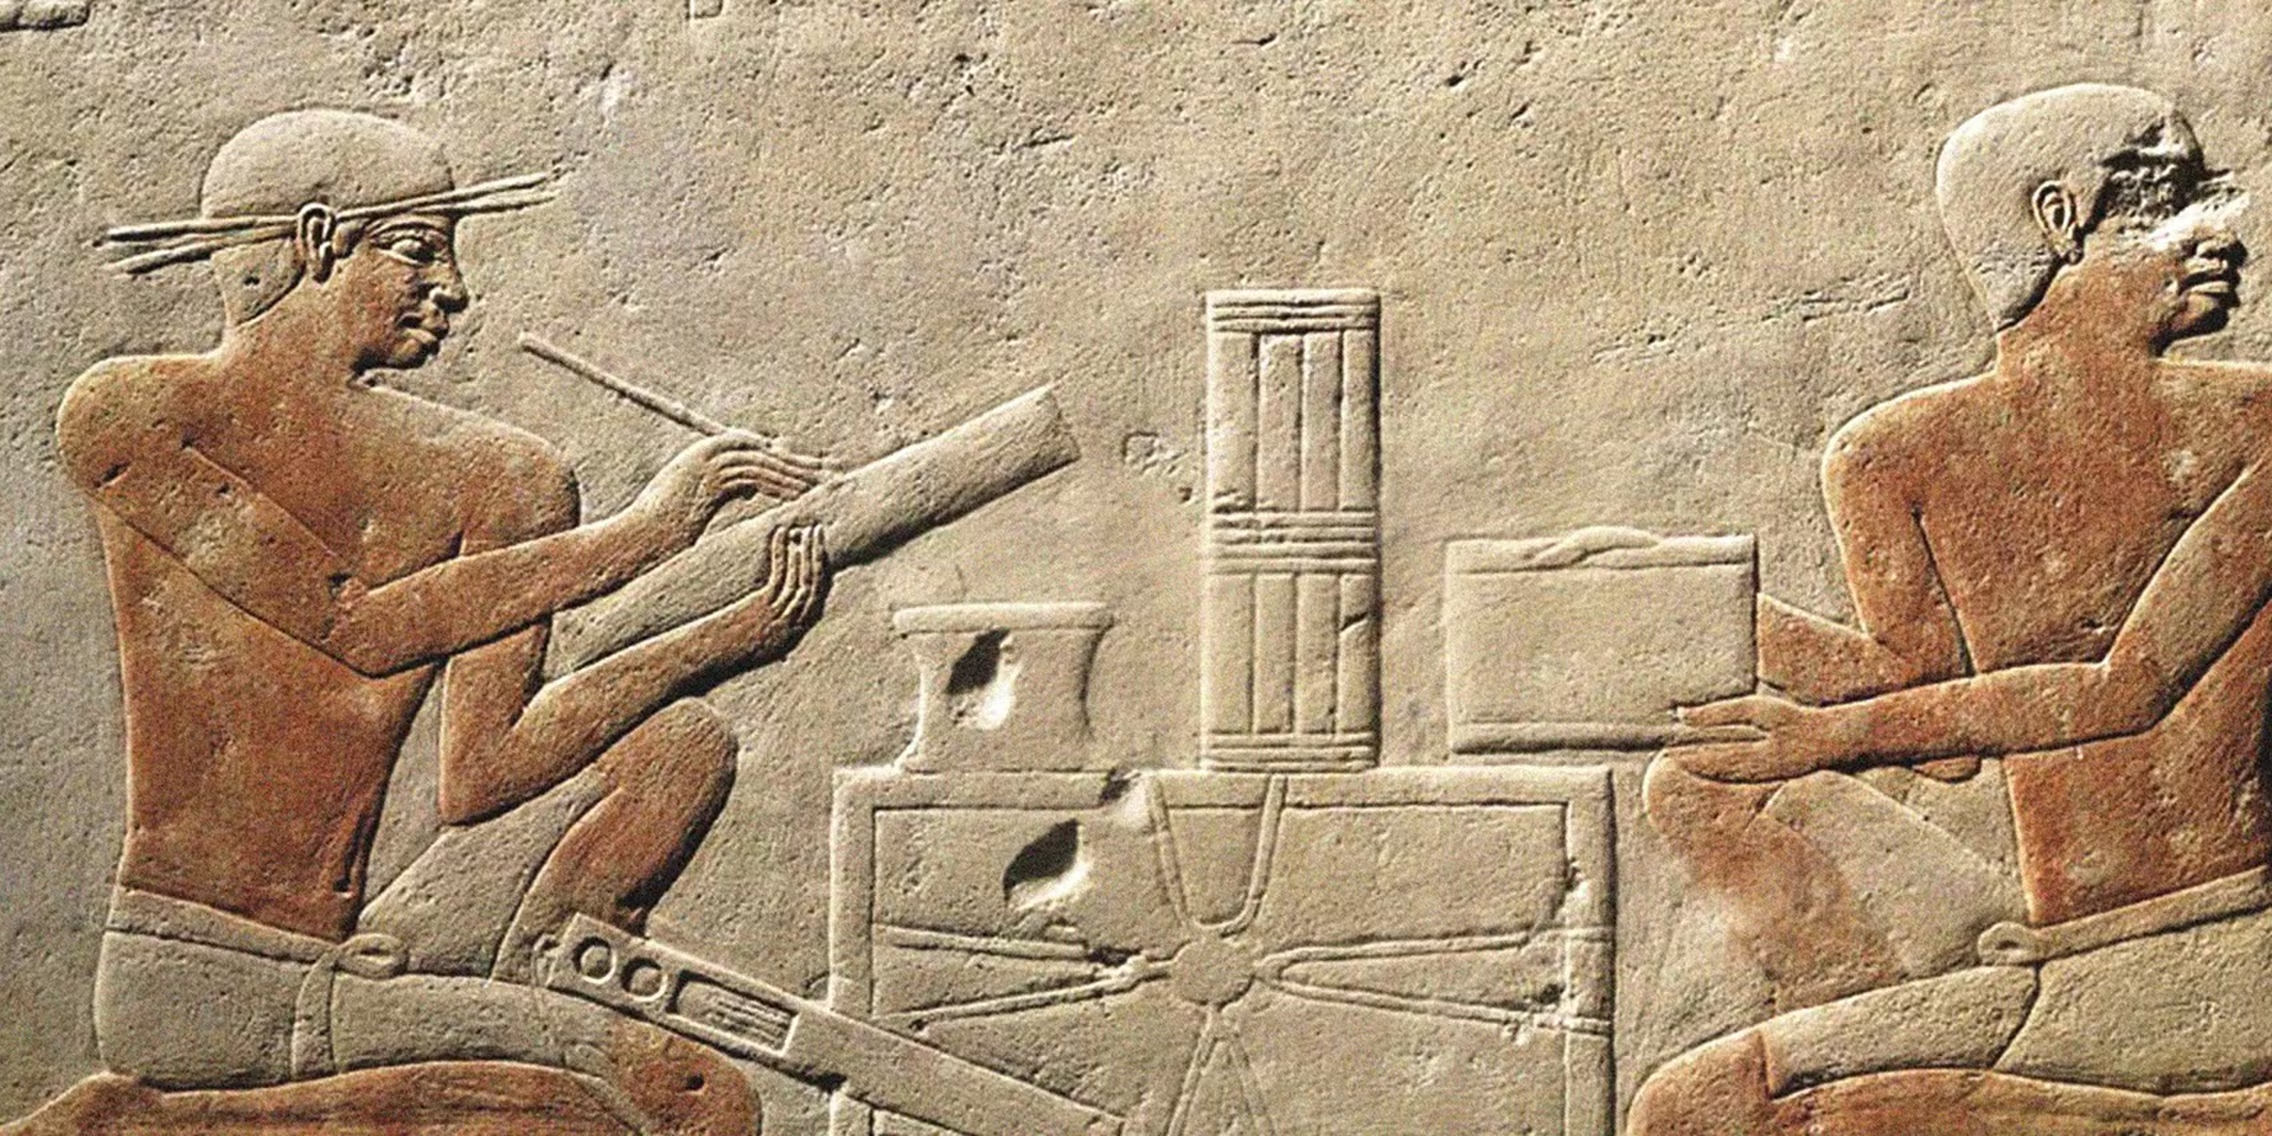

In [ ]:
#@title Fonction de sequence-matching naïve

from itertools import zip_longest

def delta(X, Y):
    """
    Computes character-by-character difference between two sequences.
    Always returns a list of (x, y) tuples for differing positions.
    """
    return [(x, y) for x, y in zip_longest(X, Y, fillvalue='') if x != y]

Lorsqu'il y a un décalage au niveau des caractères (des graphèmes), cette fonction simple et naïve échoue à aligner les séquences :

Par exemple avec le tuple **('επαρηλθεν, παρηλθεν)** on comprend que le scribe égyptien a ajouté à "**ε**" au début du mot.

In [ ]:
print(delta("επαρηλθεν", "παρηλθεν"))

Il peut aussi y avoir duplication d'une même lettre par exemple avec **('νοταρριων, νοταριων)** où on constate que le scribe egyptien a mit deux fois "ρ". Il semble qu'il s'agisse d'une faute d'orthographe très commune mais cette fonction naive ne permet pas de le capturer :

In [ ]:
print(delta("νοταρριων", "νοταριων"))

Les erreurs des scribes peuvent être de trois sortes :
- **omission** (oubli d'un graphème),
- **addition** (ajout d'un graphème),
- **substitution** (remplaçcement d'un graphème par un autre).

In [5]:
#@title Fonction de séquence matching définie sur ces trois types d'erreurs scribales

import difflib


def delta(X, Y):
    if X == Y:
        return []

    matcher = difflib.SequenceMatcher(None, X, Y)

    differences = []
    for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        if tag == 'replace':
            differences.append((X[i1:i2], Y[j1:j2]))
        elif tag == 'delete':
            differences.append((X[i1:i2], ''))
        elif tag == 'insert':
            differences.append(('', Y[j1:j2]))


    return differences

In [6]:
# Addition scribale exemple 1
print(delta("επαρηλθεν", "παρηλθεν"))

[('ε', '')]


In [7]:
# Addition scribale exemple 2
print(delta("νοταρριων", "νοταριων"))

[('ρ', '')]


In [8]:
# Exemple d'omission
print(delta("λοος", "λογος"))

[('', 'γ')]


In [9]:
# Exemple de substitution
print(delta("λοκος", "λογος"))

[('κ', 'γ')]


Cette fonction basée sur la Distance de Levenshtein (nombre minimal d'opérations pour passer d'un mot à l'autre) semble mieux cibler les erreurs scribales.

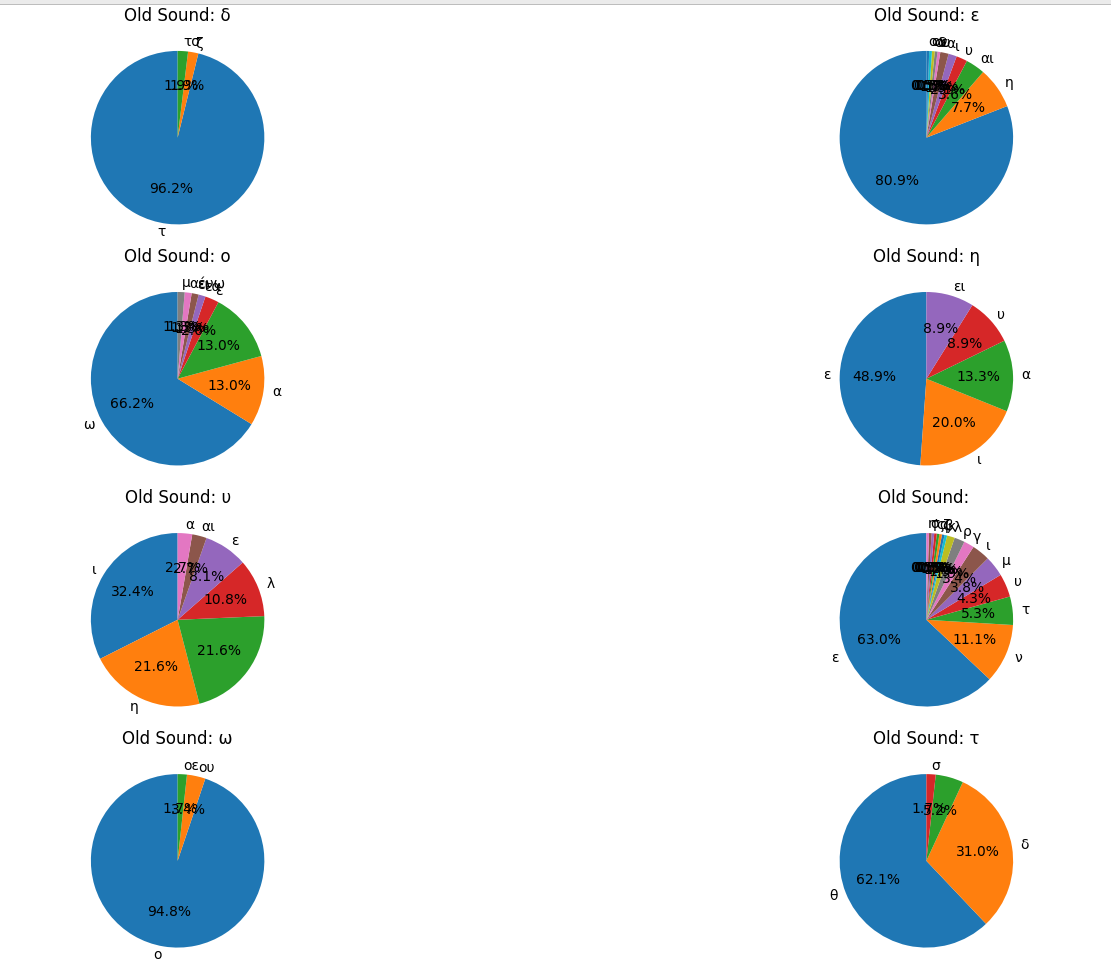

In [ ]:
df['Text Irregularities'].iloc[8]

# Transition

Quelles sont les colonnes du df ? Eliminez toutes celles qui vous paraissent inutiles et sauvez cela dans un fichier nommé "clean_papyrus-corpus.csv"
C'est ce fichier qui servira de base d'affichage du front de l'application que vous allez construire

# III) Présenter le corpus /4

L'objectif de cette partie est de vous familiariser avec Streamlit https://streamlit.io/
Une librairie très intuitive pour construire en peu de lignes de codes une pseudo page web.

Lisez la documentation et les tutoriels  pour pouvoir suivre les consignes et construire l'application https://streamlit.io/components

L'ensemble de l'application doit être stockée dans un fichier unique nommé streamlit_papyrus.py et pouvoir tourner sans erreur au lancement de la commande
"streamlit run streamlit_papyrus.py"

# 9) Création de l'application présentant les papyrus

En utilisant les composants streamlit adaptés, créez:

* Sur la page principal, le titre de l'application ("La Chasse aux Papyrus"), une image de votre choix, ainsi qu'une description de l'application
* Dans la barre à gauche, créez un menu déroulant permettant de choisir un papyrus parmi tous ceux de la collection
* Si un papyrus est sélectionné, les informations principales le concernant sont affichées sur la page centrale
(numéro dans la collection en haut centré
, Date, Provenance, Personnes, Lieux et Textual Irregularities (utilisez le système de colones et composants pour les présenter sous la forme clé / valeur)
* Il y a vraiment beaucoup de papyri à choisir ! Pour simplifier la sélection, donnez l'option de mettre des filtres sur la provenance et  la date de découverte (selectbox pour le lieu, slider pour la date) dont la manipulation va limiter le nombre de papyrus potentiellement sélectionnable

# 10) enrichissement des données

Le but est d'approfondir sa connaissance de streamlit
* Faites en sorte que quand on clique sur un nom de lieu ou de personne on fasse apparaître la liste des papyri dans lesquels il apparaît
* Faites apparaître les corrections de la colonne Text Irregularities dans le texte sous forme d'annotation textuelle streamlit

*Ajoutez une fonctionnalité supplémentaire à l'application.
* Expliquez son intêrét et comment vous l'avez codé




# BONUS HARDCORE (/2 points) :

Affichez les lieux mentionnés dans les papyri sur une carte